In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy


In [119]:
df1=pd.read_csv(r"D:\Downloads\ratings.csv\movies.csv")
df2=pd.read_csv(r"D:\Downloads\ratings.xls")

In [141]:
df1.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [121]:
df2.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [122]:
from IPython.display import display, HTML
df1_html = df1.head().to_html()
styled_html1 = f'<div style="font-size:24px;"><b>Movies Ratings:</b></div>{df1_html}'
display(HTML(styled_html1))


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [123]:
from IPython.display import display, HTML
df2_html = df2.head().to_html()
styled_html2 = f'<div style="font-size:24px;"><b>Ratings:</b></div>{df2_html}'

display(HTML(styled_html2))


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [126]:
missing_values_df1=df1.isnull()
missing_values_df2=df2.isnull()

print('missing values in df1:')
print(missing_values_df1)

print('\n missing values in df2:')
print(missing_values_df2)


missing values in df1:
       movieId  title  genres
0        False  False   False
1        False  False   False
2        False  False   False
3        False  False   False
4        False  False   False
...        ...    ...     ...
10324    False  False   False
10325    False  False   False
10326    False  False   False
10327    False  False   False
10328    False  False   False

[10329 rows x 3 columns]

 missing values in df2:
        userId  movieId  rating  timestamp
0        False    False   False      False
1        False    False   False      False
2        False    False   False      False
3        False    False   False      False
4        False    False   False      False
...        ...      ...     ...        ...
105334   False    False   False      False
105335   False    False   False      False
105336   False    False   False      False
105337   False    False   False      False
105338   False    False   False      False

[105339 rows x 4 columns]


In [127]:
# Remove any rows with missing values in the ratings data
df2 = df2.dropna()

# Remove any duplicate rows in both datasets
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [128]:
df1.describe()


,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [129]:
df2.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [132]:
# Basic descriptive statistics for df1
print("Descriptive statistics for df1:")
print(df1.describe(include='all'))  # include='all' to get statistics for all columns, not just numeric

# Basic descriptive statistics for df2
print("Descriptive statistics for df2:")
print(df2.describe(include='all'))

# You can also check for the mode, which is especially useful for categorical data
print("Mode for df1:")
print(df1.mode().head(1))  # Shows the most common value in each column

print("Mode for df2:")
print(df2.mode().head(1))


Descriptive statistics for df1:
              movieId                     title genres
count    10329.000000                     10329  10329
unique            NaN                     10327    938
top               NaN  War of the Worlds (2005)  Drama
freq              NaN                         2   1385
mean     31924.282893                       NaN    NaN
std      37734.741149                       NaN    NaN
min          1.000000                       NaN    NaN
25%       3240.000000                       NaN    NaN
50%       7088.000000                       NaN    NaN
75%      59900.000000                       NaN    NaN
max     149532.000000                       NaN    NaN
Descriptive statistics for df2:
              userId        movieId         rating     timestamp
count  105339.000000  105339.000000  105339.000000  1.053390e+05
mean      364.924539   13381.312477       3.516850  1.130424e+09
std       197.486905   26170.456869       1.044872  1.802660e+08
min         1.00

In [130]:
for column in df1.columns:
    print(f"Unique values in {column}: {df1[column].nunique()}")

Unique values in movieId: 10329
Unique values in title: 10327
Unique values in genres: 938


In [131]:
for column in df2.columns:
    print(f"Unique values in {column}: {df2[column].nunique()}")

Unique values in userId: 668
Unique values in movieId: 10325
Unique values in rating: 10
Unique values in timestamp: 84686


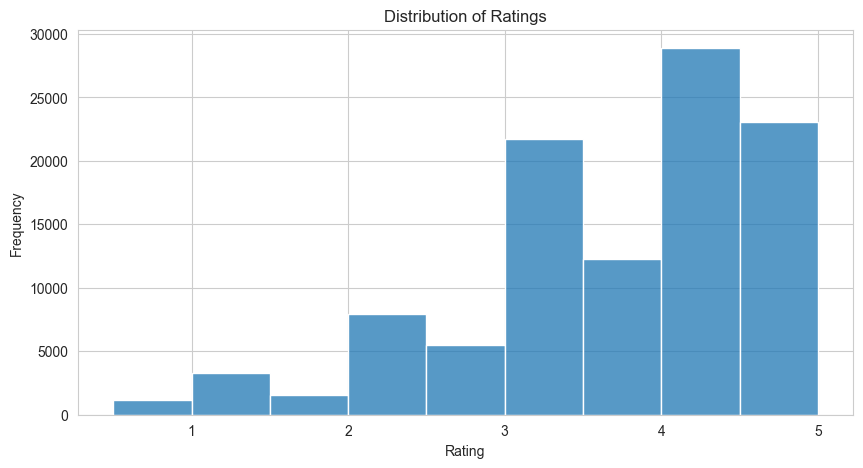

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of ratings from df2
plt.figure(figsize=(10, 5))
sns.histplot(df2['rating'], bins=9, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



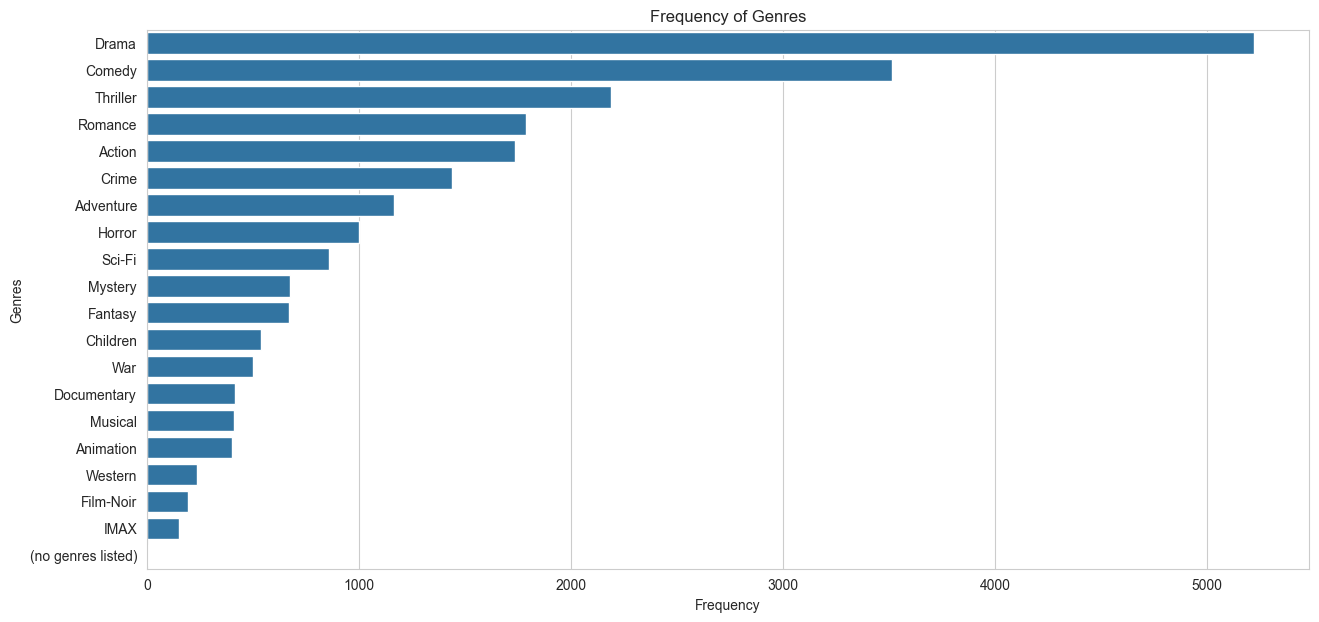

In [134]:

genres_series = df1['genres'].str.split('|').explode()

plt.figure(figsize=(15, 7))
sns.countplot(y=genres_series, order=genres_series.value_counts().index)
plt.title('Frequency of Genres')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()  


In [135]:

df = pd.merge(df1, df2, on='movieId')
df.head()


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [136]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [137]:
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [138]:

reader = Reader(rating_scale=(df2['rating'].min(), df2['rating'].max()))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)
model1 = SVD()
model1.fit(trainset)
predictions1 = model1.test(testset)
rmse1 = accuracy.rmse(predictions1)



RMSE: 0.8684


In [139]:
model2 = KNNBasic()
model2.fit(trainset)
predictions2 = model2.test(testset)
rmse2 = accuracy.rmse(predictions2)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9535


In [140]:
def get_user_recommendations(user_id, model, n_recommendations=5):
    unrated_movies = [movie_id for movie_id in df['movieId'].unique() if movie_id not in df[df['userId'] == user_id]['movieId']]
    recommendations = [(movie_id, model.predict(user_id, movie_id).est) for movie_id in unrated_movies]
    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_recommendations = recommendations[:n_recommendations]
    
    return top_recommendations


user_id = int(input("Enter your user ID: "))

recommendations = get_user_recommendations(user_id, algorithm)
print("Recommendations for user", user_id, ":")
for movie_id, rating in recommendations:
    movie_title = df[df['movieId'] == movie_id]['title'].iloc[0]
    print(f"{movie_title:<55}: {rating}")

Enter your user ID:  2


Recommendations for user 2 :
Godfather, The (1972)                                  : 4.877406766227093
Band of Brothers (2001)                                : 4.7843839616347115
Ran (1985)                                             : 4.757933253709353
Chinatown (1974)                                       : 4.747281251084477
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)          : 4.726486666124399
